## Linear Regression 

Ricardo Vallejo


## 1.1) Chargement de donnes, transform annee et rename columne.

In [415]:
import pandas as pd
import numpy as np

df = pd.read_csv("nyc_meteo.csv")
df.head(5)

# Get year from Date
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)

# Rename column Value to Temperature
df = df.rename(columns={'Value': 'Temperature'})

# Select variables to study
data = df[['Year', 'Temperature']]

# Show first 5 lines
data.head(5)




,Year,Temperature
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4


In [416]:
#Show number and type of data

data['Temperature'].describe()




count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

In [417]:
data['Year'].max()

2018

In [418]:
data['Year'].min()

1895

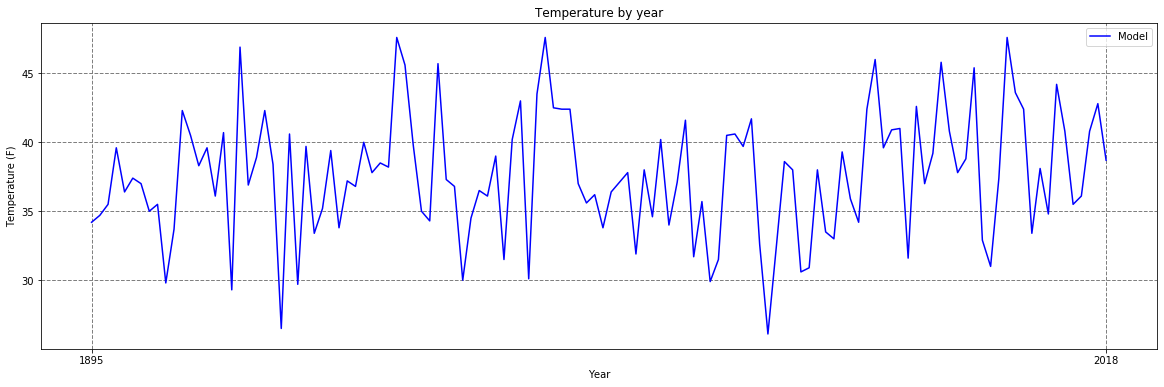

In [419]:
plt.figure(figsize=(20, 6))
plt.plot(data['Year'], data['Temperature'], 'b-', label='Model')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Temperature (F)")
plt.xlabel("Year")
plt.title('Temperature by year')
plt.xticks([data['Year'].min(), data['Year'].max()])
plt.legend(loc='best')
plt.show()


## 1.2)  Data Split

In [420]:
# 2)  Split in traning and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(data.Year, data.Temperature, test_size=0.20, random_state=11)

print("Size Year training set: ", X_train.shape)
print("Size Year test set: ", X_test.shape)

print("Size Temperature training set: ", y_train.shape)
print("Size Temperature test set: ", y_test.shape)


Size Year training set:  (99,)
Size Year test set:  (25,)
Size Temperature training set:  (99,)
Size Temperature test set:  (25,)


# 1.3) Model Development

In [421]:
from sklearn import datasets, linear_model

# Obtain info from series for validation
X_train.describe()


count      99.000000
mean     1958.323232
std        35.800419
min      1896.000000
25%      1927.500000
50%      1958.000000
75%      1989.500000
max      2018.000000
Name: Year, dtype: float64

In [422]:
# Obtain info from series for validation and recognition
y_train.describe()

count    99.00000
mean     37.70000
std       4.65745
min      26.10000
25%      34.65000
50%      37.40000
75%      40.60000
max      47.60000
Name: Temperature, dtype: float64

In [423]:
# Modele

xtrain = np.array(X_train).reshape((-1,1))
ytrain = y_train
regression1 = linear_model.LinearRegression()
regression1.fit(xtrain, ytrain)
print("Slope: ", regression1.coef_)
print("Intercept: ", regression1.intercept_)
 # y = mx + b ==> y = Slope * X + Intercept                  

Slope:  [0.01471056]
Intercept:  8.891970558021129


# 1.4) Predictions with the model

In [424]:
#Error RSS
xtest = np.array(X_test).reshape((-1,1))
ytest = y_test

predictiontest = regression1.predict(xtest)
print("Error RSS: \n ", np.mean(( predictiontest - ytest)**2))

print('Variance score: %.5f' % regression1.score(xtest, ytest))

Error RSS: 
  16.101108671946562
Variance score: 0.00330


In [425]:
# First 10 Predictions 

columns = ['Year', 'Predicted Temperatures']
xtest = np.array(X_test)
data = np.array([xtest, predictiontest]).transpose()
df = pd.DataFrame(data=data, columns=columns)
df.head(10)


,Year,Predicted Temperatures
0,1968.0,37.842351
1,1897.0,36.797901
2,1972.0,37.901193
3,1904.0,36.900875
4,1911.0,37.003849
5,2011.0,38.474905
6,1895.0,36.768480
7,1931.0,37.298060
8,1956.0,37.665824
9,1951.0,37.592271


# 1.5) Predicition for year 2020

In [426]:
prediction2020 = regression1.predict([[2020]])
print(prediction2020)

[38.60729973]


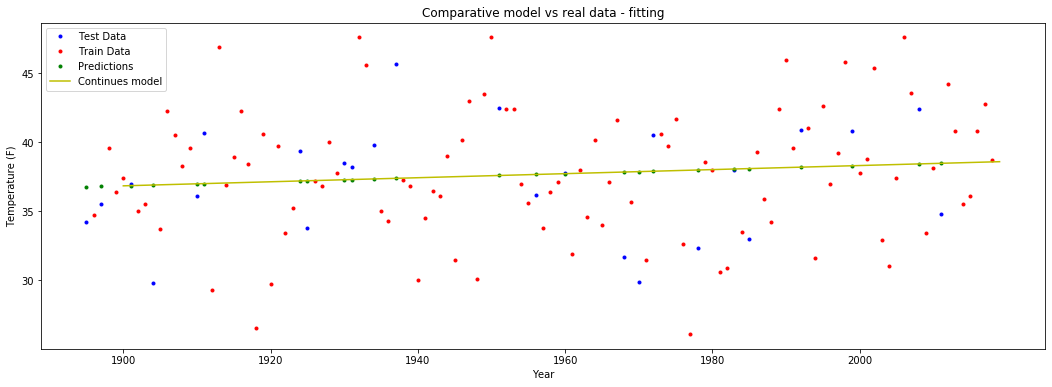

In [427]:
#Predicition
def Yy(m, b, x):
    return m*x + b;

Xmodel = range(1900,2020, 1)
Ymodel = Yy(regression1.coef_, regression1.intercept_,  Xmodel)


plt.figure(figsize=(18, 6))
plt.plot(X_test, y_test, 'b.', label='Test Data')
plt.plot(X_train, y_train, 'r.', label='Train Data')
plt.plot(X_test, predictiontest, 'g.', label='Predictions')
plt.plot(Xmodel, Ymodel, 'y-', label='Continues model')

#plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Temperature (F)")
plt.xlabel("Year")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.xticks(np.arange(1900, 2020, 20))
plt.show()



# 2. REGRESSION MULTIPLE

# 2.1 - 2.3)  Load Data - Describe - toDataFrame

In [428]:
california = datasets.fetch_california_housing()

print("Data shape (predicteurs):" , california.data.shape)
print("Target shape (cible):" , california.target.shape)


Data shape (predicteurs): (20640, 8)
Target shape (cible): (20640,)


In [429]:
df_X = pd.DataFrame(california.data, columns=california.feature_names)
df_X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [430]:
df_y = pd.DataFrame(california.target, columns=["MedVal"])
df_y.head(5)

,MedVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


# 2.2.  Description de data

In [431]:
df_X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [432]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


# 2.4. Ajouter la serie cible

In [433]:
df_y.describe()

,MedVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [434]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MedVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


# 2.5  Split data

In [435]:
# 2)  Split in traning and test sets

target_column = 0
print(california.feature_names)
data_names = np.delete(california.feature_names, target_column)
print(data_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df_X, df_y, test_size=0.20, random_state=11)

print("Size Data training set: ", X_train.shape)
print("Size Data test set: ", X_test.shape)

print("Size Target training set: ", y_train.shape)
print("Size Target test set: ", y_test.shape)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup' 'Latitude'
 'Longitude']
Size Data training set:  (16512, 8)
Size Data test set:  (4128, 8)
Size Target training set:  (16512, 1)
Size Target test set:  (4128, 1)


# 2.6. Modele

In [436]:
# Modele

xtrain = np.array(X_train)
ytrain = y_train
regression2 = linear_model.LinearRegression()
regression2.fit(xtrain, ytrain)
print("Coeficients (xi): \n", regression2.coef_)

print("\nIntercept: (b): ", regression2.intercept_)
 # y = mx + b ==> y = Slope * X + Intercept    

Coeficients (xi): 
 [[ 4.33481147e-01  9.13203774e-03 -1.00206297e-01  6.11611814e-01
  -5.80927065e-06 -3.41460825e-03 -4.26281098e-01 -4.41029824e-01]]

Intercept: (b):  [-37.52785392]


# 2.7. Test de modele

In [468]:
#Error RSS

xtest = np.array(X_test)
ytest = y_test

predictiontest = regression2.predict(xtest)
print("Error RSS: ", np.mean(( predictiontest - ytest)**2))

print('Variance score: %.5f' % regression2.score(xtest, ytest))
print(predictiontest.shape)#.head(5)

print("Coeficients: ", regression2.coef_)
print("Intercept: ", regression2.intercept_)

Error RSS:  MedVal    0.530446
dtype: float64
Variance score: 0.60579
(4128, 1)
Coeficients:  [[ 4.33481147e-01  9.13203774e-03 -1.00206297e-01  6.11611814e-01
  -5.80927065e-06 -3.41460825e-03 -4.26281098e-01 -4.41029824e-01]]
Intercept:  [-37.52785392]


In [463]:
X_test.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2734,3.2083,34.0,5.471264,1.063218,1627.0,3.116858,32.78,-115.56
9087,5.7049,9.0,6.699571,1.085837,731.0,3.137339,34.66,-118.17
15789,1.6125,52.0,3.135135,1.364865,286.0,1.932432,37.78,-122.40
12992,5.2586,17.0,6.945035,1.131206,1809.0,3.207447,38.69,-121.26


In [464]:
y_test.head(5)

,MedVal
2734,0.762
9087,1.732
15789,1.125
12992,1.370
19275,1.856


In [466]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("mean squared error: ", np.sqrt(mean_squared_error(y_test, predictiontest)))
print("mean absoute error: ", mean_absolute_error(y_test, predictiontest))
print("R2: ", r2_score(y_test, predictiontest))  #Same Rsquared, near to 1, its a good model.


mean squared error:  0.7283172998095504
mean absoute error:  0.538594884153333
R2:  0.6057872925695522
